In [1]:
from dataloader import *
from model import *

In [2]:
test_data_loader = getDataloader(input_folder='./DRIVE/test/images', batch_size=4)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
save_path = './checkpoint/drive.pth'
model_state = torch.load(save_path)
model = UNet(in_channels=3, out_channels=1)
model.load_state_dict(model_state)
model.to(device,dtype=torch.float32)
model.eval()

UNet(
  (downs): ModuleList(
    (0): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): DoubleConv(
      (c

In [5]:
def show_result(input: torch.Tensor, output: torch.Tensor, title: str=None):
    input = np.moveaxis(input.detach().cpu().numpy(), 1, -1)
    output = np.moveaxis(output.detach().cpu().numpy(), 1, -1)
    
    num = input.shape[0]
    plt.figure(figsize=(num*5+2, 10))
    if title is not None:
        plt.suptitle(title, fontsize=20)
    for row, data in enumerate([input, output]):
        for col, item in enumerate(data):
            plt.subplot(2, num, (row)*num+(col+1))
            plt.imshow(item, cmap='gray')
    plt.show()

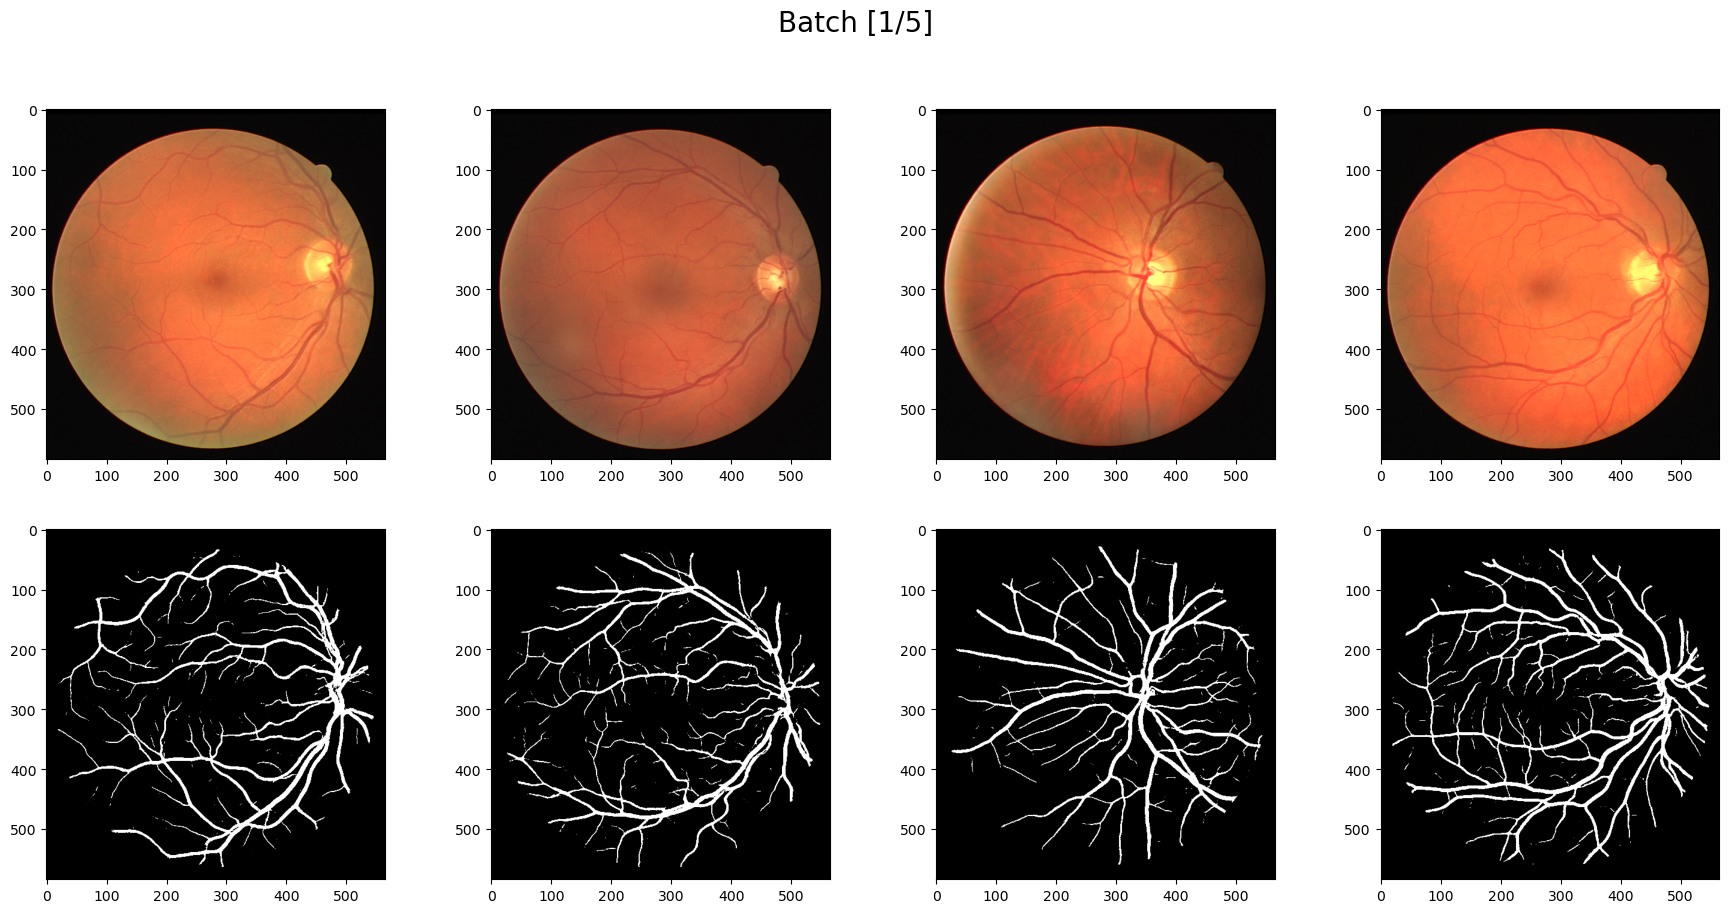

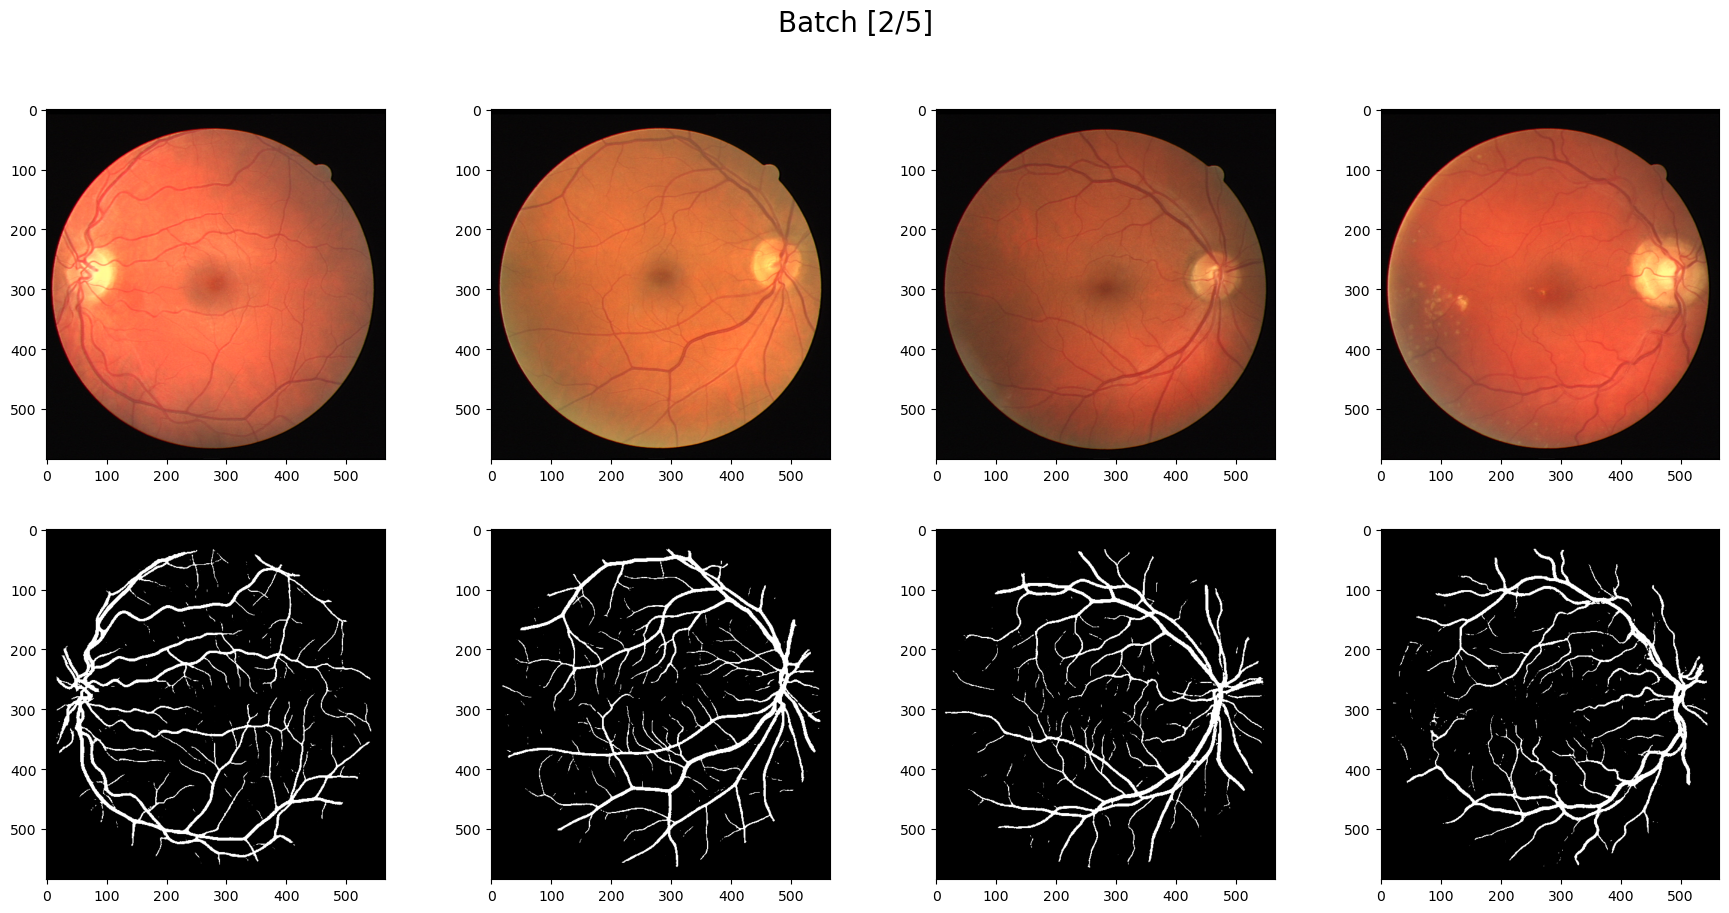

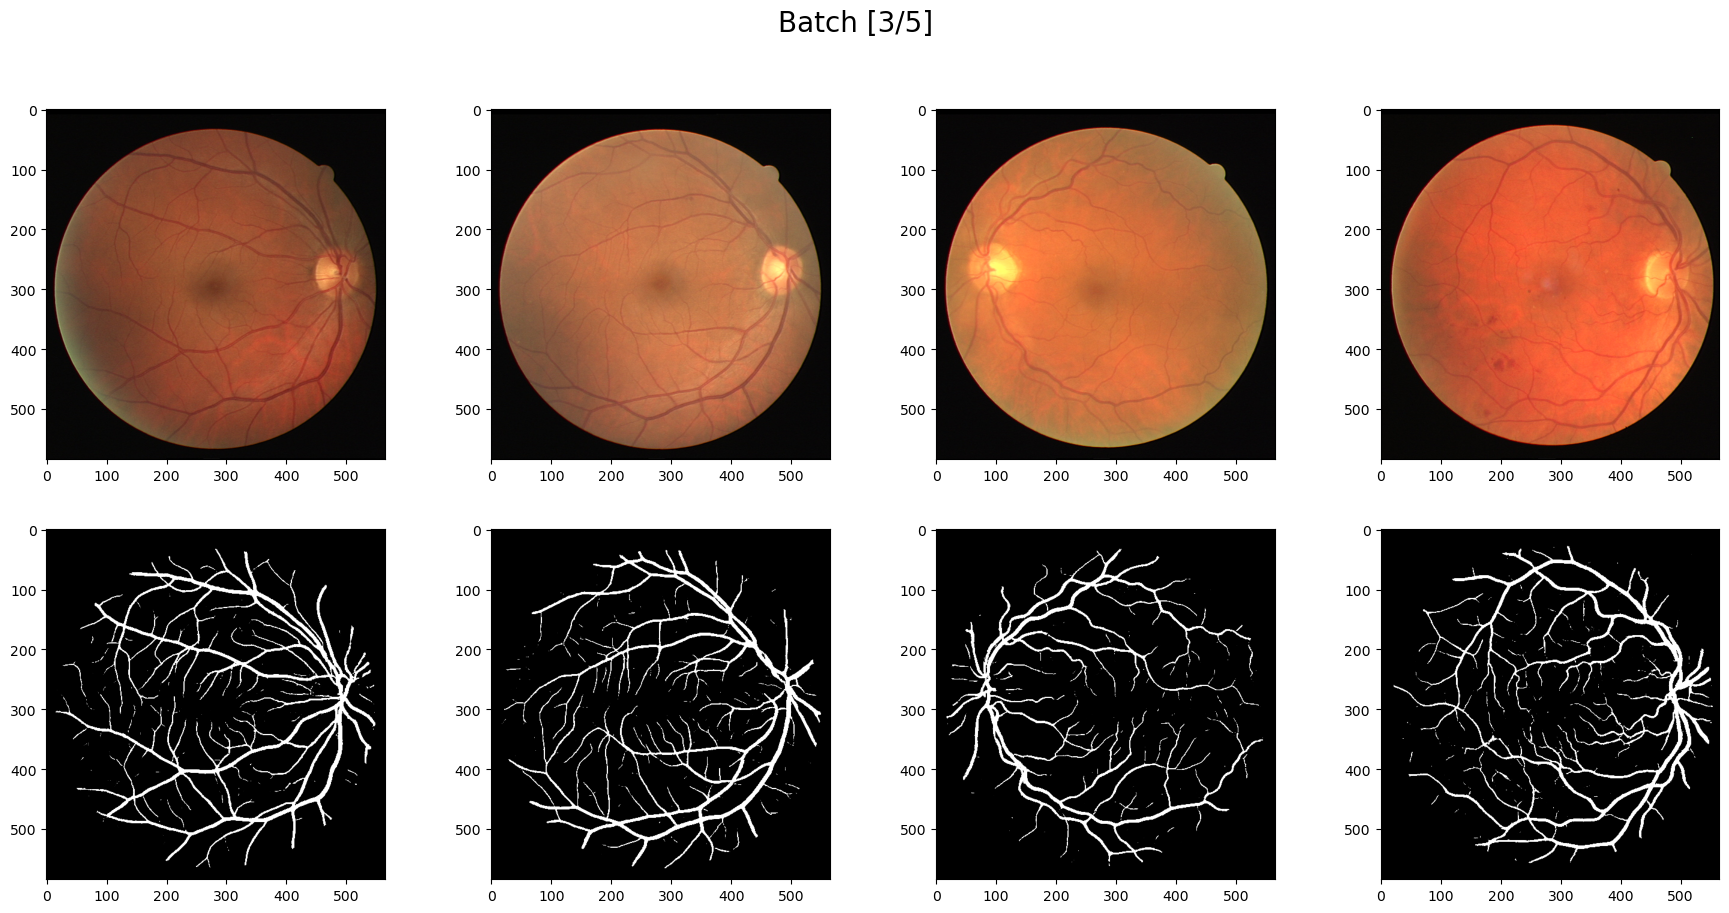

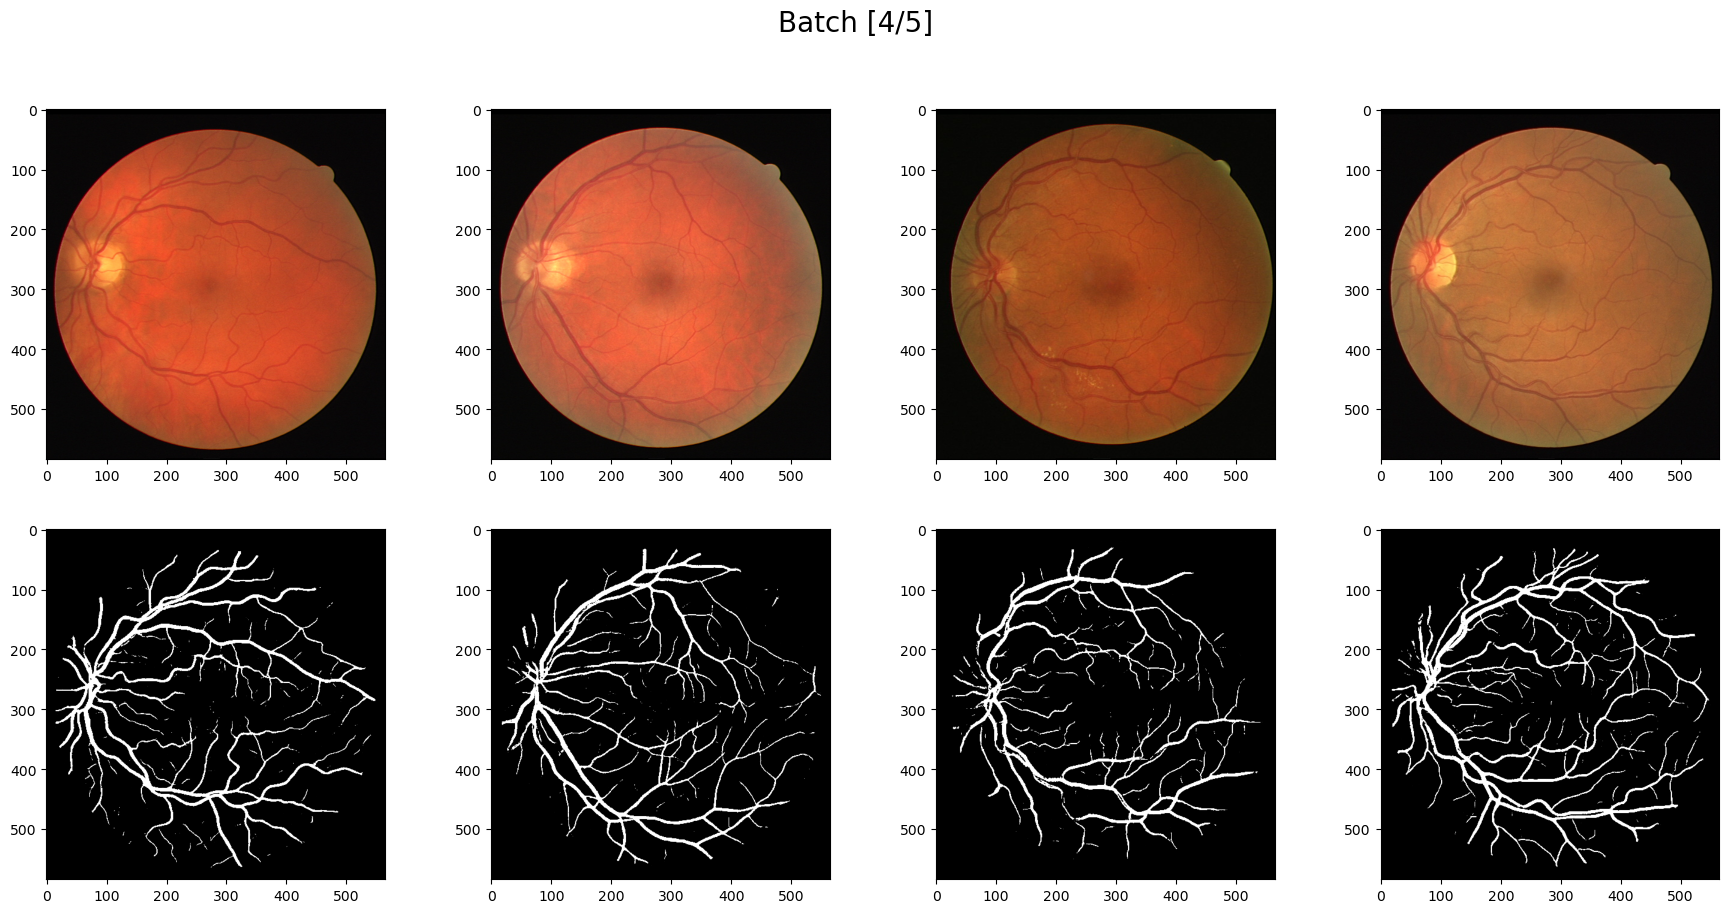

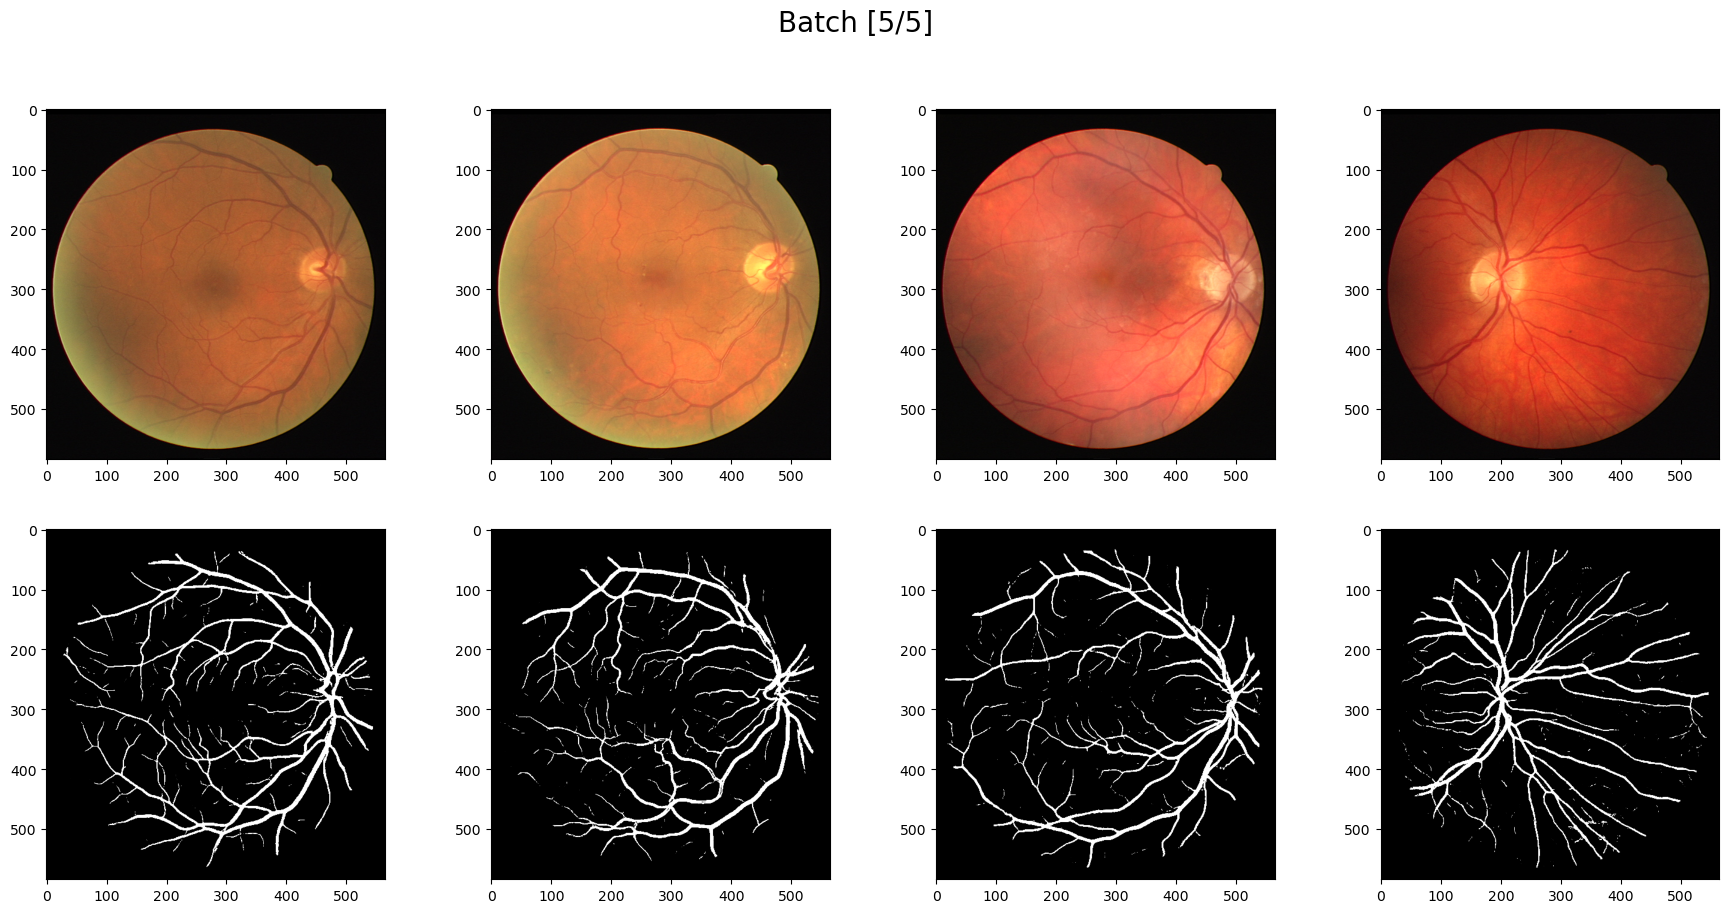

In [6]:
for index, input in enumerate(test_data_loader):
    input = input.to(device)
    output = model(input)
    show_result(input, output, title=f'Batch [{index+1}/{len(test_data_loader)}]')